In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from scipy import odr

In [3]:
archivo=pd.ExcelFile("Datos/Efecto_Hall.xlsx")

In [4]:
archivo.sheet_names

['Actividad_2_parte_1',
 'Actividad_2_parte_2',
 'Actividad_3_parte_1',
 'Actividad_3_parte_2',
 'Activi',
 'Clibracion']

In [5]:
calibracion=pd.read_excel(archivo,sheet_name="Clibracion")

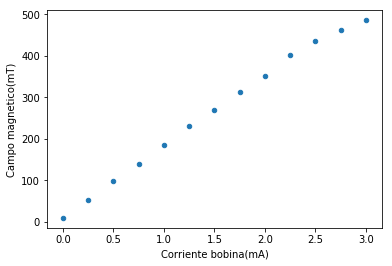

In [6]:
calibracion.plot(kind="scatter",x="Corriente bobina(mA)",y="Campo magnetico(mT)")

In [7]:
def model(x,a,b):
    return a*x+b

In [8]:
x_obs = np.array(calibracion["Corriente bobina(mA)"])
y_obs = np.array(calibracion["Campo magnetico(mT)"])
y_err = np.ones(len(x_obs))*1
x_err = np.ones(len(x_obs))*0.1*0.5

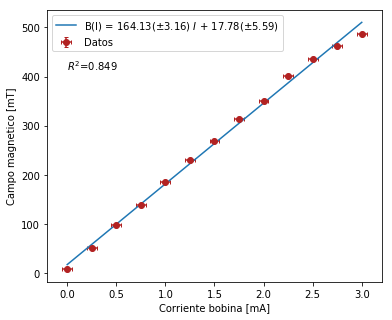

In [9]:
popt, pcov = curve_fit(model, x_obs, y_obs)

x=np.linspace(min(x_obs),max(x_obs))
perr = np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

fig=plt.figure(figsize=(6,5))

plt.errorbar(x_obs,y_obs,yerr=y_err,xerr=x_err,capsize=2,fmt="o",color="firebrick",label="Datos")
            #ret += '({}{})'.format(i, '**%d' % num if num > 1 else '')
plt.plot(x,model(x,*popt),label=r"B(I) = {}($\pm${}) $I$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                    round(perr[0],2),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))

plt.text(min(x_obs), 0.85*max(y_obs), r'$R^2$={}'.format(round(R_2,3)))
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlabel("Corriente bobina [mA]")
plt.ylabel("Campo magnetico [mT]")
plt.legend()
plt.savefig("Figuras/Calibracion.png")
plt.show()

# Fit con errores en X y en Y ODR(Orthogonal distance regression)

In [10]:
def model(p,x):
    a,b=p
    return a*x+b

In [11]:
x_obs = np.array(calibracion["Corriente bobina(mA)"])
y_obs = np.array(calibracion["Campo magnetico(mT)"])
y_err = np.ones(len(x_obs))*5
x_err = np.ones(len(x_obs))*0.1*0.5

In [12]:
linear = odr.Model(model)
mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
myodr = odr.ODR(mydata, linear, beta0=[160., 15.]) # se crea la clase para hacer el fit con valores iniciales de los parametros
myoutput = myodr.run()# se corre la regresion
popt = myoutput.beta
#perr = myoutput.sd_beta
pcov= myoutput.cov_beta
perr=np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

In [13]:
print("fit parameter 1-sigma error")
for i in range(len(popt)):
    print(str(popt[i])+"+/- "+str(perr[i]))

fit parameter 1-sigma error
164.62245455893307+/- 2.858615374410804
17.050933858310902+/- 5.051830740650569


In [14]:
#graficar los intervalos de confidencia
nstd = 5.0 #Dibujar 5 sigma
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr
x_fit = np.linspace(min(x_obs)-0.05, max(x_obs)+0.05, 100)
fit = model(popt, x_fit)
fit_up = model(popt_up, x_fit)
fit_dw= model(popt_dw, x_fit)

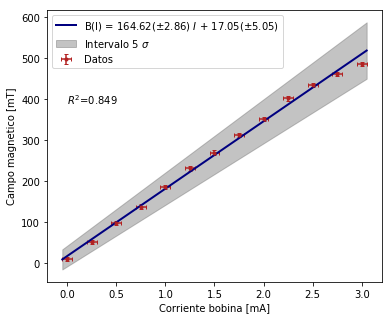

In [15]:
plt.figure(figsize=(6,5))
plt.rcParams["font.size"]= 10
plt.errorbar(x_obs, y_obs, yerr=y_err, xerr=x_err,capsize=2,fmt=".",color="firebrick", label="Datos",ecolor="firebrick")
#plt.xlabel("Corriente bobina [mA]", fontsize=18)
#plt.ylabel("Campo magnetico(mT)", fontsize=18)
plt.xlabel("Corriente bobina [mA]")
plt.ylabel("Campo magnetico [mT]")
#plt.title("fit with error on both axis", fontsize=18)
plt.plot(x_fit, fit, "navy", lw=2, label=r"B(I) = {}($\pm${}) $I$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                    round(perr[0],2),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))
plt.fill_between(x_fit, fit_up, fit_dw, alpha=.4,color="dimgray", label=r"Intervalo {} $\sigma$".format(int(nstd)))
#plt.legend(loc="best",fontsize=18)
plt.text(min(x_obs), 0.8*max(y_obs), r'$R^2$={}'.format(round(R_2,3)))
plt.legend(loc="best")
plt.savefig("Figuras/Calibracion_error.png")
plt.show()

# Segunda actividad

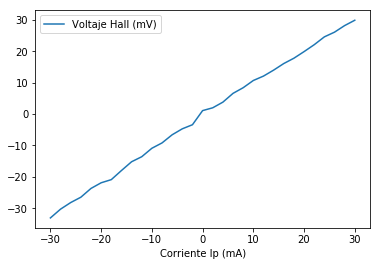

In [16]:
Act_2_1=pd.read_excel(archivo,sheet_name='Actividad_2_parte_1')
Act_2_1=Act_2_1[Act_2_1["Campo magnetico (mA)"]==1]
Act_2_1.plot(x="Corriente Ip (mA)",y="Voltaje Hall (mV)")

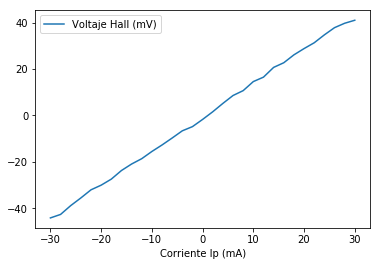

In [17]:
Act_2_1=pd.read_excel(archivo,sheet_name='Actividad_2_parte_1')
Act_2_1=Act_2_1[Act_2_1["Campo magnetico (mA)"]==1.5]
Act_2_1.plot(x="Corriente Ip (mA)",y="Voltaje Hall (mV)")

In [44]:
def model(p,x):
    a,b=p
    return a*x+b
x_obs = np.array(Act_2_1["Corriente Ip (mA)"])
y_obs = np.array(Act_2_1["Voltaje Hall (mV)"])
y_err = np.ones(len(x_obs))*0.7
x_err = np.ones(len(x_obs))*0.5
linear = odr.Model(model)
mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
myodr = odr.ODR(mydata, linear, beta0=[1.46, 1.]) # se crea la clase para hacer el fit con valores iniciales de los parametros
myoutput = myodr.run()# se corre la regresion
popt = myoutput.beta
#perr = myoutput.sd_beta
pcov= myoutput.cov_beta
perr=np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

In [46]:
nstd = 5.0 #Dibujar 5 sigma
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr
x_fit = np.linspace(min(x_obs)-0.05, max(x_obs)+0.05, 100)
fit = model(popt, x_fit)
fit_up = model(popt_up, x_fit)
fit_dw= model(popt_dw, x_fit)

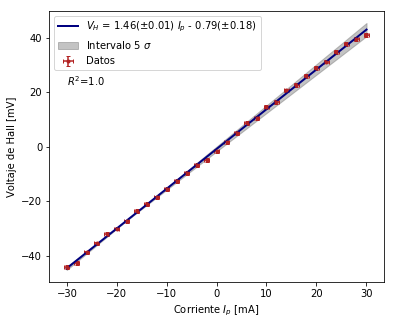

In [47]:
plt.figure(figsize=(6,5))
plt.rcParams["font.size"]= 10
plt.errorbar(x_obs, y_obs, yerr=y_err, xerr=x_err,capsize=2,fmt=".",color="firebrick", label="Datos",ecolor="firebrick")
#plt.xlabel("Corriente bobina [mA]", fontsize=18)
#plt.ylabel("Campo magnetico(mT)", fontsize=18)
plt.xlabel(r"Corriente $I_p$ [mA]")
plt.ylabel("Voltaje de Hall [mV]")
#plt.title("fit with error on both axis", fontsize=18)
plt.plot(x_fit, fit, "navy", lw=2, label=r"$V_H$ = {}($\pm${}) $I_p$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                    round(perr[0],2),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))
plt.fill_between(x_fit, fit_up, fit_dw, alpha=.4,color="dimgray", label=r"Intervalo {} $\sigma$".format(int(nstd)))
#plt.legend(loc="best",fontsize=18)
plt.text(min(x_obs), 0.55*max(y_obs), r'$R^2$={}'.format(round(1-R_2,5)))
plt.legend(loc="best")
plt.savefig("Figuras/Voltaje_hall_ip.png")
plt.show()

# Actividad 2 parte 2

In [48]:
Act_2_2=pd.read_excel(archivo,sheet_name='Actividad_2_parte_2')

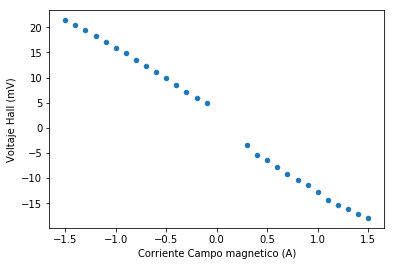

In [49]:
Act_2_2.plot(kind="scatter",x="Corriente Campo magnetico (A)",y="Voltaje Hall (mV)")

In [75]:
x_obs = np.array(Act_2_2["Corriente Campo magnetico (A)"])
y_obs = np.array(Act_2_2["Voltaje Hall (mV)"])
y_err = np.ones(len(x_obs))*0.7
x_err = np.ones(len(x_obs))*0.07
linear = odr.Model(model)
mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
myodr = odr.ODR(mydata, linear, beta0=[-14, 1.]) # se crea la clase para hacer el fit con valores iniciales de los parametros
myoutput = myodr.run()# se corre la regresion
popt = myoutput.beta
#perr = myoutput.sd_beta
pcov= myoutput.cov_beta
perr=np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

In [76]:
nstd = 5.0 #Dibujar 5 sigma
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr
x_fit = np.linspace(min(x_obs)-0.05, max(x_obs)+0.05, 100)
fit = model(popt, x_fit)
fit_up = model(popt_up, x_fit)
fit_dw= model(popt_dw, x_fit)

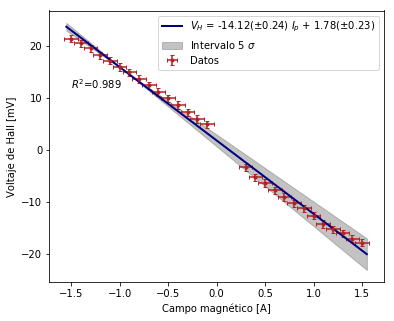

In [77]:
plt.figure(figsize=(6,5))
plt.rcParams["font.size"]= 10
plt.errorbar(x_obs, y_obs, yerr=y_err, xerr=x_err,capsize=2,fmt=".",color="firebrick", label="Datos",ecolor="firebrick")
#plt.xlabel("Corriente bobina [mA]", fontsize=18)
#plt.ylabel("Campo magnetico(mT)", fontsize=18)
plt.xlabel(r"Campo magnético [A]")
plt.ylabel("Voltaje de Hall [mV]")
#plt.title("fit with error on both axis", fontsize=18)
plt.plot(x_fit, fit, "navy", lw=2, label=r"$V_H$ = {}($\pm${}) $I_p$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                    round(perr[0],2),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))
plt.fill_between(x_fit, fit_up, fit_dw, alpha=.4,color="dimgray", label=r"Intervalo {} $\sigma$".format(int(nstd)))
#plt.legend(loc="best",fontsize=18)
plt.text(min(x_obs), 0.55*max(y_obs), r'$R^2$={}'.format(round(1-R_2,3)))
plt.legend(loc="best")
plt.savefig("Figuras/Voltaje_hall_Campo_magnetico.png")
plt.show()

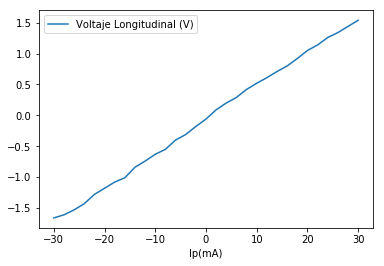

In [78]:
Act_3_1=pd.read_excel(archivo,sheet_name='Actividad_3_parte_1')
Act_3_1.plot(y="Voltaje Longitudinal (V)",x="Ip(mA)")

In [79]:
x_obs = np.array(Act_3_1["Ip(mA)"])
y_obs = np.array(Act_3_1["Voltaje Longitudinal (V)"])
y_err = np.ones(len(x_obs))*0.07
x_err = np.ones(len(x_obs))*0.5
linear = odr.Model(model)
mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
myodr = odr.ODR(mydata, linear, beta0=[1.46, 1.]) # se crea la clase para hacer el fit con valores iniciales de los parametros
myoutput = myodr.run()# se corre la regresion
popt = myoutput.beta
#perr = myoutput.sd_beta
pcov= myoutput.cov_beta
perr=np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

In [80]:
nstd = 5.0 #Dibujar 5 sigma
popt_up = popt + nstd*perr
popt_dw = popt - nstd*perr
x_fit = np.linspace(min(x_obs)-0.05, max(x_obs)+0.05, 100)
fit = model(popt, x_fit)
fit_up = model(popt_up, x_fit)
fit_dw= model(popt_dw, x_fit)

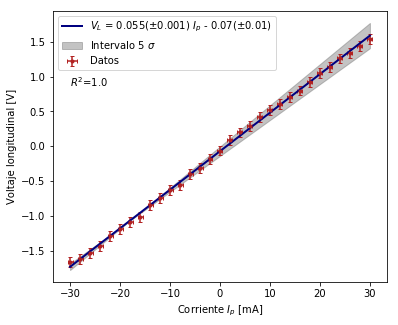

In [84]:
plt.figure(figsize=(6,5))
plt.rcParams["font.size"]= 10
plt.errorbar(x_obs, y_obs, yerr=y_err, xerr=x_err,capsize=2,fmt=".",color="firebrick", label="Datos",ecolor="firebrick")
#plt.xlabel("Corriente bobina [mA]", fontsize=18)
#plt.ylabel("Campo magnetico(mT)", fontsize=18)
plt.xlabel(r"Corriente $I_p$ [mA]")
plt.ylabel("Voltaje longitudinal [V]")
#plt.title("fit with error on both axis", fontsize=18)
plt.plot(x_fit, fit, "navy", lw=2, label=r"$V_L$ = {}($\pm${}) $I_p$ {} {}($\pm${})".format(round(popt[0],3),
                                                                                    round(perr[0],3),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],2)))
plt.fill_between(x_fit, fit_up, fit_dw, alpha=.4,color="dimgray", label=r"Intervalo {} $\sigma$".format(int(nstd)))
#plt.legend(loc="best",fontsize=18)
plt.text(min(x_obs), 0.55*max(y_obs), r'$R^2$={}'.format(round(1-R_2,3)))
plt.legend(loc="best")
plt.savefig("Figuras/Voltaje_longitudinal_ip.png")
plt.show()

In [85]:
Act_3_2=pd.read_excel(archivo,sheet_name='Actividad_3_parte_2')
#Act_3_1.plot(y="Voltaje Longitudinal (V)",x="Ip(mA)")

In [99]:
Act_3_2[Act_3_2["campo magnetico(A)"]==0.5]

,campo magnetico(A),Voltaje Longitudinal (V),Ip(mA)
7,0.5,-1.87,-30
8,0.5,-1.24,-20
9,0.5,-0.69,-10
10,0.5,-0.05,0
11,0.5,0.55,10
12,0.5,1.05,20
13,0.5,1.63,30


In [102]:
errores=[]
resistencias=[]
for i in Act_3_2["campo magnetico(A)"].unique():
    aux=Act_3_2[Act_3_2["campo magnetico(A)"]==i]
    x_obs = np.array(aux["Ip(mA)"])
    y_obs = np.array(aux["Voltaje Longitudinal (V)"])
    y_err = np.ones(len(x_obs))*0.07
    x_err = np.ones(len(x_obs))*0.5
    linear = odr.Model(model)
    mydata = odr.RealData(x_obs, y_obs, sx=x_err, sy=y_err) # crea el objeto de datos con desviacion estandar en x y y
    myodr = odr.ODR(mydata, linear, beta0=[1.46, 1.]) # se crea la clase para hacer el fit con valores iniciales de los parametros
    myoutput = myodr.run()# se corre la regresion
    popt = myoutput.beta
    #perr = myoutput.sd_beta
    pcov= myoutput.cov_beta
    perr=np.sqrt(np.diag(pcov))
    print(popt,perr)
    R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))
    resistencias.append(popt[0])
    errores.append(perr[0])

[ 0.05679741 -0.07857142] [0.00142762 0.02855189]
[ 0.05829283 -0.08857141] [0.00143298 0.02865934]
[ 0.05600329 -0.05714286] [0.0014248  0.02849588]
[0.0422799  0.27571427] [0.0013858 0.0276377]
[ 0.05382313 -0.05857143] [0.00141727 0.02834536]
[ 0.05428805 -0.05714285] [0.00141886 0.02837708]
[ 0.05493027 -0.0742857 ] [0.00142106 0.02842115]
[ 0.05510833 -0.07      ] [0.00142168 0.02843346]
[ 0.05621936 -0.08142855] [0.00142556 0.02851106]
[0.06554477 0.01714268] [0.00146084 0.02921368]
[ 0.05964395 -0.09714286] [0.00143793 0.02875848]
[ 0.05825088 -0.07285715] [0.00143282 0.02865632]


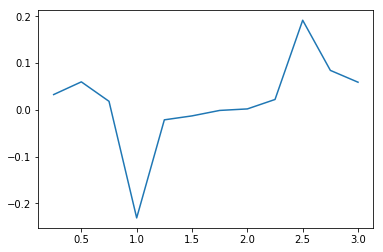

In [101]:
resistencias=np.array(resistencias)
plt.plot(Act_3_2["campo magnetico(A)"].unique(),(resistencias-0.055)/0.055)